In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("C://Users//Ansh Jhoshi//Downloads//Music_Genre_Classification//Data//features_3_sec.csv")
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [3]:
print("df.shape = ",df.shape)
print("df.dtype := \n",df.dtypes)

df.shape =  (9990, 60)
df.dtype := 
 filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [5]:
df = df.drop(labels='filename', axis=1)
df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [6]:
#------------------------------------------------------------------------------------------------

In [7]:
# 1. Understanding the audio

In [8]:
#librosa is a python package for music and audio analysis. 
#It provides the building blocks necessary to create music information retrieval systems.

audio_example = "C://Users//Ansh Jhoshi//Downloads//Music_Genre_Classification//Data//genres_original//hiphop//hiphop.00015.wav"


#Load an audio file as a floating point time series.
#Audio will be automatically resampled to the given rate

#Returns ndarray and sampling rate of y


data, sr = librosa.load(audio_example)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [9]:
#sr - sampling rate- number of samples per second.
#Human audible range - 20 kHz
#But it will be too long, let's take some short to say 45000 kHz
librosa.load(audio_example, sr = 45000)

(array([ 0.03292409, -0.03524673, -0.12031323, ...,  0.01386641,
         0.05867687,  0.04642978], dtype=float32),
 45000)

In [10]:
"""
Audio libraries we will use-
Librosa = Librosa is a python package for music and audio analysis. 
It provides the building blocks necessary to create music information retrieval systems. 
By using Librosa, we can extract certain key features from the audio samples such as Tempo, 
Chroma Energy Normalized, Mel-Freqency Cepstral Coefficients, Spectral Centroid, Spectral Contrast, 
Spectral Rolloff, and Zero Crossing Rate.

Python.display.Audio = With the help of IPython.display.Audio we can play audio in the notebook. 
It is a library used for playing the audio in the jupyterlab.

Waveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis. 
They are great for allowing us to quickly scan the audio data and visually compare and contrast which genres 
might be more similar than others.
"""

'\nAudio libraries we will use-\nLibrosa = Librosa is a python package for music and audio analysis. \nIt provides the building blocks necessary to create music information retrieval systems. \nBy using Librosa, we can extract certain key features from the audio samples such as Tempo, \nChroma Energy Normalized, Mel-Freqency Cepstral Coefficients, Spectral Centroid, Spectral Contrast, \nSpectral Rolloff, and Zero Crossing Rate.\n\nPython.display.Audio = With the help of IPython.display.Audio we can play audio in the notebook. \nIt is a library used for playing the audio in the jupyterlab.\n\nWaveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis. \nThey are great for allowing us to quickly scan the audio data and visually compare and contrast which genres \nmight be more similar than others.\n'

In [11]:
import IPython
IPython.display.Audio(data, rate = sr)

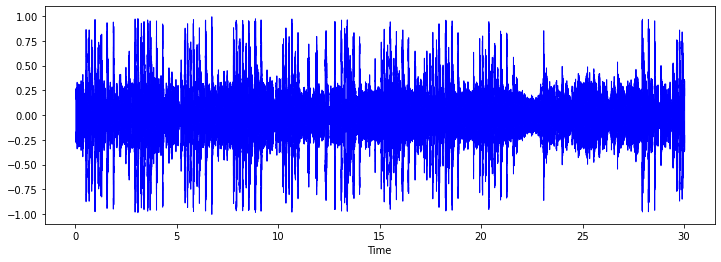

In [12]:
import librosa.display
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color="blue")
plt.show()

E:\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


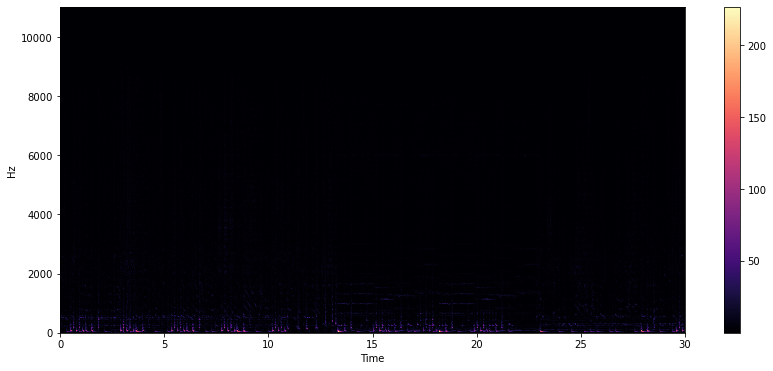

In [13]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [17]:
"""
Short-time Fourier transform (STFT).

The STFT represents a signal in the time-frequency domain by computing 
discrete Fourier transforms (DFT) over short overlapping windows

The Short-time Fourier transform (STFT), is a Fourier-related transform used to determine 
the sinusoidal frequency and phase content of local sections of a signal as it changes over time.

STFT provides the time-localized frequency information for situations in which frequency components of a signal vary over time

librosa.load- takes input music file, returns audio time series
librosa.stft- takes input signal, returns complex-valued matrix of short-term Fourier transform coefficients
librosa.amplitude_to_sb- takes input amplitude, say s, returns s in dB 
"""

'\nShort-time Fourier transform (STFT).\n\nThe STFT represents a signal in the time-frequency domain by computing \ndiscrete Fourier transforms (DFT) over short overlapping windows\n\nThe Short-time Fourier transform (STFT), is a Fourier-related transform used to determine \nthe sinusoidal frequency and phase content of local sections of a signal as it changes over time.\n\nSTFT provides the time-localized frequency information for situations in which frequency components of a signal vary over time\n\nlibrosa.load- takes input music file, returns audio time series\nlibrosa.stft- takes input signal, returns complex-valued matrix of short-term Fourier transform coefficients\nlibrosa.amplitude_to_sb- takes input amplitude, say s, returns s in dB \n'

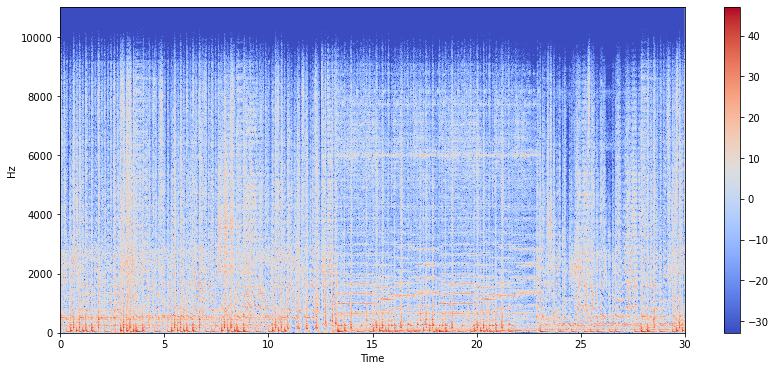

In [14]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

<ipython-input-16-7420111a90fd>:3: FutureWarning: Pass y=[ 0.04549194 -0.11539673 -0.06580567 ...  0.11067749 -0.03244995
  0.07140137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]


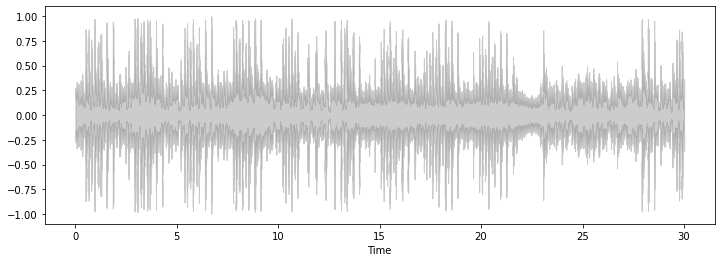

In [16]:
from sklearn.preprocessing import normalize

spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize = (12,4))
librosa.display.waveshow(data, sr = sr, alpha = 0.4, color="grey")

In [21]:
"""
Spectral Rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies


Chroma feature - It is a powerful tool for analyzing music features whose pitches can be meaningfully 
categorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features 
is that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation.


chroma_stft - takes input as audio time series returns normalized energy for each chroma bin at each frame
"""

'\nSpectral Rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies\n\n\nChroma feature - It is a powerful tool for analyzing music features whose pitches can be meaningfully \ncategorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features \nis that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation.\n\n\nchroma_stft - takes input as audio time series returns normalized energy for each chroma bin at each frame\n'

<ipython-input-20-2f4a856ec188>:3: FutureWarning: Pass y=[ 0.03549194 -0.12539673 -0.07580566 ...  0.10067749 -0.04244995
  0.06140137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr = sr)


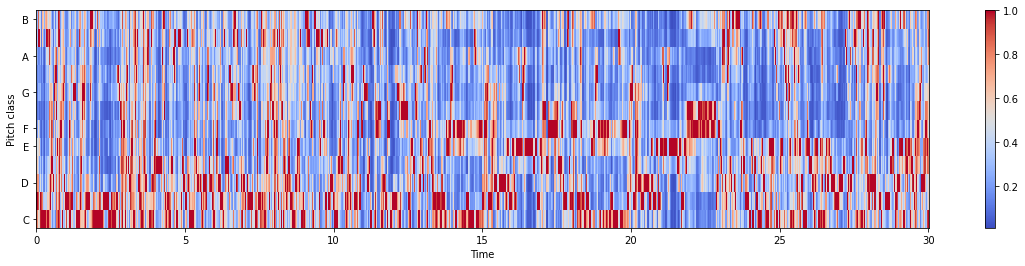

In [20]:
import librosa.display as lplt

chroma = librosa.feature.chroma_stft(data, sr = sr)
plt.figure(figsize=(20,4))
lplt.specshow(chroma, sr = sr, x_axis="time", y_axis = "chroma", cmap="coolwarm")
plt.colorbar()
plt.show()

In [ ]:
"""
Zero crossing rate - Zero crossing is said to occur if successive samples have different algebraic signs. 
The rate at which zero-crossings occur is a simple measure of the frequency content of a signal. 
Zero-crossing rate is a measure of the number of times in a given time interval/frame that the amplitude of 
the speech signals passes through a value of zero.
"""

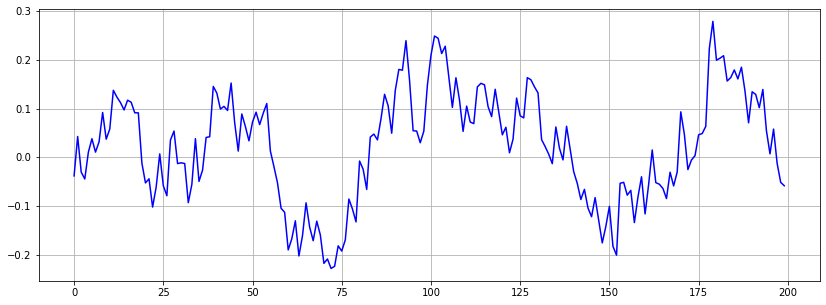

In [22]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color = "blue")
plt.grid()

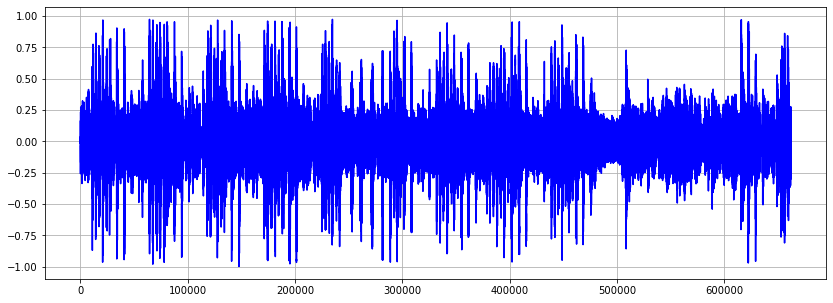

In [23]:
plt.figure(figsize=(14,5))
plt.plot(data, color = "blue")
plt.grid()

In [24]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("Number of zero crossings is ", sum(zero_cross_rate))

Number of zero crossings is  24


In [26]:
total_zero_cross_rate = librosa.zero_crossings(data, pad=False)
print("Total zero_crossings are ", sum(total_zero_cross_rate))

Total zero_crossings are  76964


In [28]:
#Feature extraction
# Enough of preprocessings, now lets do some real thing
#------------------------------------------------------------------------------------------------------------------

In [29]:
#Working on df once again


In [30]:
labels = df.iloc[:, -1]
le = LabelEncoder()

In [31]:
y = le.fit_transform(labels)
y

array([0, 0, 0, ..., 9, 9, 9])

In [32]:
print(df.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [33]:
#As we can see that our data is not quite normalized, with some values way more than thousands, and some in decimels

from sklearn.preprocessing import StandardScaler
fit = StandardScaler()

X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))
X

array([[ 0.        , -0.48780784,  0.64052047, ..., -0.51356204,
         0.12841417, -0.29178072],
       [ 0.        , -0.40314187,  0.13183473, ...,  1.01138445,
         1.27578001,  0.05642464],
       [ 0.        , -0.36169428,  0.7644909 , ..., -0.04624405,
         0.65390663, -0.52145798],
       ...,
       [ 0.        , -0.35433044,  0.42997426, ..., -0.15370124,
         0.11765485, -0.33882395],
       [ 0.        ,  0.0883611 , -0.00630133, ..., -0.72456977,
         0.30333409, -0.95893743],
       [ 0.        , -0.11321002,  0.19536324, ..., -0.37245283,
        -0.47495901, -0.55112155]])

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25)

In [36]:
print(len(Y_train))
print(len(Y_test))

7492
2498


In [ ]:
#-----------------------------------------------------------------------------------------------------------
#Building model

"""
There are many ways to train the models, some of which are

Multiclass Support Vector Machines

K-Means Clustering

K-Nearest Neighbors

Convolutional Neural Networks


We will be using CNN Algorithm for training our model. 
We chose this approach because various forms of research show it to have the best results for this problem.
"""

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
def train_model(model, epochs, optimizer):
    batch_size = 128
    
    model.compile(optimizer = optimizer, 
                 loss = 'sparse_categorical_crossentropy',
                 metrics='accuracy')
    
    return model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=epochs, batch_size=batch_size)

In [43]:
def plotValidate(history):
    print("validation accuracy ", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation='softmax'),
])

print(model.summary())

model_history = train_model(model = model, epochs = 600, optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               30208     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 5

In [47]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size = 128)

print("Test loss is \n", test_loss)
print("\nThe best accuracy is :", test_acc*100)

20/20 [==============================] - 0s 2ms/step - loss: 3.2838 - accuracy: 0.9103
Test loss is 
 3.2837934494018555

The best accuracy is : 91.03282690048218
